# Imbalanced Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_pickle('df_feature_selection.pkl')

In [3]:
df

,state,day,job_category,age_category,location,age,count_acct_num,count_zip,city_pop_log,amt_log,category_gas transport,category_grocery pos,category_shopping net,category_shopping pos,time_category_Evening,time_category_Morning,is_fraud
185,4,8,13,1,1,22,68,180,9.633580,4.404644,False,False,True,False,True,False,0
186,4,10,13,1,1,22,68,180,9.633580,4.226542,False,False,True,False,True,False,0
187,4,22,13,1,1,22,68,180,9.633580,2.255493,False,False,True,False,False,False,0
188,4,23,13,1,1,22,68,180,9.633580,1.075002,False,False,True,False,True,False,0
189,4,7,13,1,1,22,68,180,9.633580,0.262364,False,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364531,5,26,7,0,1,57,59,59,9.260082,5.408695,False,False,False,True,False,True,0
1364532,5,1,7,0,1,57,59,59,9.260082,3.971800,False,False,False,True,False,False,0
1364533,5,29,7,0,1,57,59,59,9.260082,4.798102,False,False,False,True,False,False,0
1364534,5,26,7,0,1,57,59,59,9.260082,4.194341,False,False,False,True,False,True,0


In [4]:
df['is_fraud'].value_counts()

is_fraud
0    248391
1      1391
Name: count, dtype: int64

In [5]:
ratio=1391/(1391+248391)
ratio*100

0.5568856042469034

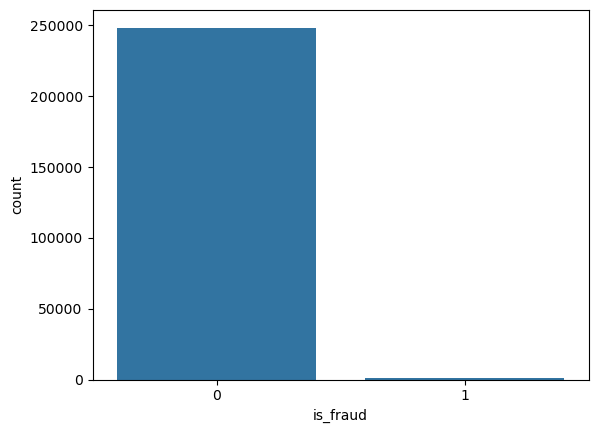

In [6]:
sns.countplot(x='is_fraud', data=df)
plt.show()

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_fraud',axis=1), df['is_fraud'], test_size=0.3, random_state=42)

In [9]:
# Define the classification metrics function
def classificationMetrics(y, yhat):
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    return metrics

In [10]:
model = RandomForestClassifier(random_state=42)
# model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
classificationMetrics(y_test, y_pred)

{'Accuracy': 0.9993194101554681,
 'Precision': 1.0,
 'Recall': 0.8776978417266187,
 'F1-Score': 0.9348659003831418}

# Imbalanced techniques

In [11]:
techniques = {
    "ROS": RandomOverSampler(random_state=47),
    "RUS": RandomUnderSampler(random_state=47),
    "SMOTE": SMOTE(random_state=47),
    "SMOTETomek": SMOTETomek(random_state=47)
}

In [12]:
# Evaluate and collect results using list comprehension
results = [
    {
        "Technique": name,
        "Accuracy": accuracy_score(y_test, model.predict(X_test)),
        "Precision": precision_score(y_test, model.predict(X_test)),
        "Recall": recall_score(y_test, model.predict(X_test)),
        "F1-Score": f1_score(y_test, model.predict(X_test))
    }
    for name, technique in techniques.items()
    for model in [LogisticRegression(random_state=42).fit(*technique.fit_resample(X_train, y_train))]
]
# Display results
results_df = pd.DataFrame(results)
print(results_df)

    Technique  Accuracy  Precision    Recall  F1-Score
0         ROS  0.958658   0.111111  0.918465  0.198240
1         RUS  0.947795   0.089692  0.916067  0.163388
2       SMOTE  0.893187   0.041682  0.827338  0.079365
3  SMOTETomek  0.893187   0.041682  0.827338  0.079365


In [13]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Technique,Accuracy,Precision,Recall,F1-Score
0,ROS,0.958658,0.111111,0.918465,0.198240
1,RUS,0.947795,0.089692,0.916067,0.163388
2,SMOTE,0.893187,0.041682,0.827338,0.079365
3,SMOTETomek,0.893187,0.041682,0.827338,0.079365


In [14]:
confusion_matrix(y_test,y_pred)

array([[74518,     0],
       [   51,   366]], dtype=int64)

In [15]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
# Display results
print(f"Confusion Matrix:\nTP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")

Confusion Matrix:
TP: 366, FP: 0, TN: 74518, FN: 51


## Synthetic Minority Over-sampling Technique (SMOTE)

In [16]:
smote = SMOTE()

In [17]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)


In [18]:
model.fit(X_smote,y_smote)
confusion_matrix(y_test,y_pred)


array([[74518,     0],
       [   51,   366]], dtype=int64)

In [19]:
pred_smote = model.predict(X_test)
confusion_matrix(y_test,pred_smote)

array([[74497,    21],
       [   32,   385]], dtype=int64)

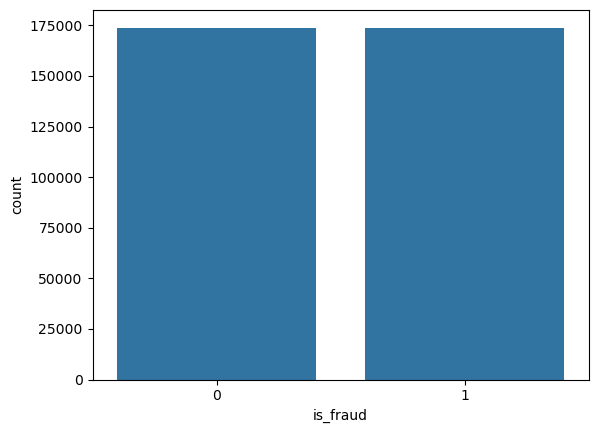

In [20]:
df_smote = pd.DataFrame(X_smote, columns=X_train.columns)
df_smote['is_fraud'] = y_smote
# df_smote = pd.DataFrame({'is_fraud': y_smote})
sns.countplot(x='is_fraud', data=df_smote)
plt.show()

Confusion Matrix (SMOTE Model):
[[74497    21]
 [   32   385]]

Classification Report (SMOTE Model):
              precision    recall  f1-score   support

           0    0.99957   0.99972   0.99964     74518
           1    0.94828   0.92326   0.93560       417

    accuracy                        0.99929     74935
   macro avg    0.97392   0.96149   0.96762     74935
weighted avg    0.99929   0.99929   0.99929     74935



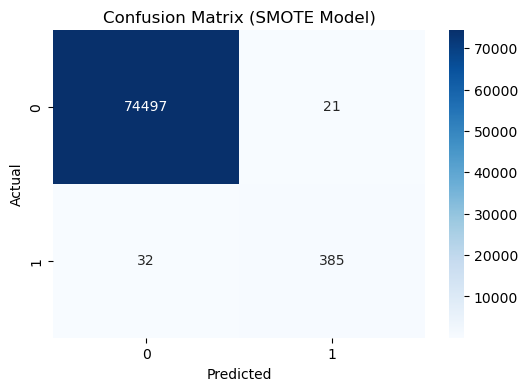

In [21]:
# Compute confusion matrix
cm_SMOTE = confusion_matrix(y_test, pred_smote)

# Print confusion matrix and classification report
print("Confusion Matrix (SMOTE Model):")
print(cm_SMOTE)

print("\nClassification Report (SMOTE Model):")
print(classification_report(y_test, pred_smote, digits=5))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm_SMOTE, "Confusion Matrix (SMOTE Model)")

In [22]:
# df_smote.value_counts()

In [23]:
df_smote

,state,day,job_category,age_category,location,age,count_acct_num,count_zip,city_pop_log,amt_log,category_gas transport,category_grocery pos,category_shopping net,category_shopping pos,time_category_Evening,time_category_Morning,is_fraud
0,0,12,15,0,1,27,147,147,9.538276,2.157559,False,False,False,True,False,False,0
1,1,21,15,1,1,25,63,151,10.819578,5.504559,False,False,True,False,False,False,0
2,1,27,0,0,1,71,72,72,9.534523,2.244956,False,False,False,True,False,True,0
3,1,29,11,0,1,31,62,62,10.123065,0.845868,False,False,False,True,False,False,0
4,5,29,14,0,1,48,54,54,9.441928,2.634762,False,False,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347741,6,16,11,0,1,56,40,184,11.111298,6.502789,False,False,False,True,True,False,1
347742,5,8,1,0,1,74,33,53,11.154392,6.732149,False,False,True,False,True,False,1
347743,5,5,4,0,1,38,87,449,11.521092,4.219923,False,False,False,False,True,False,1
347744,6,7,5,0,0,73,91,91,7.075809,3.221712,True,True,False,False,False,True,1


In [24]:
# Saving the test DataFrame as a pickle file
df_smote.to_pickle("df_smote.pkl")

In [25]:
df_smote['is_fraud'].value_counts()

is_fraud
0    173873
1    173873
Name: count, dtype: int64

## Random Over-Sampling (ROS)

In [26]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [27]:
# # Splitting original dataset
# X_train, X_test, y_train, y_test = train_test_split(df.drop('is_fraud',axis=1), df['is_fraud'], test_size=0.3, random_state=42)

# Initialize Random Over Sampler (ROS)
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Print class distribution after ROS
print("Class distribution after ROS:\n", pd.Series(y_train_ros).value_counts())




Class distribution after ROS:
 is_fraud
0    173873
1    173873
Name: count, dtype: int64


In [28]:
y_train_ros

0         0
1         0
2         0
3         0
4         0
         ..
347741    1
347742    1
347743    1
347744    1
347745    1
Name: is_fraud, Length: 347746, dtype: int64

In [29]:
# Initialize and train a model
model_ros = RandomForestClassifier(random_state=42)
model_ros.fit(X_train_ros, y_train_ros)

# Predictions on original test set
y_pred_ros = model_ros.predict(X_test)


Confusion Matrix (ROS Model):
[[74515     3]
 [   43   374]]

Classification Report (ROS Model):
              precision    recall  f1-score   support

           0    0.99942   0.99996   0.99969     74518
           1    0.99204   0.89688   0.94207       417

    accuracy                        0.99939     74935
   macro avg    0.99573   0.94842   0.97088     74935
weighted avg    0.99938   0.99939   0.99937     74935



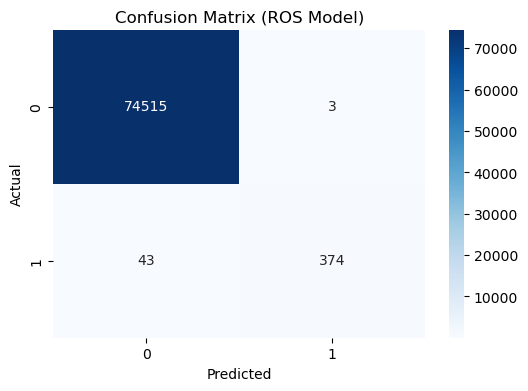

In [30]:
# Compute confusion matrix
cm_ros = confusion_matrix(y_test, y_pred_ros)

# Print confusion matrix and classification report
print("Confusion Matrix (ROS Model):")
print(cm_ros)

print("\nClassification Report (ROS Model):")
print(classification_report(y_test, y_pred_ros, digits=5))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm_ros, "Confusion Matrix (ROS Model)")


In [31]:
import pandas as pd

# Combine X and y into a new DataFrame
df_ros = pd.DataFrame(X_train_ros, columns=X_train.columns)
df_ros['is_fraud'] = y_train_ros  # Add target column back

# Save to CSV
df_ros.to_csv('df_ros.csv', index=False)

In [32]:
df_ros.to_pickle("df_ros.pkl")

In [33]:
df_ros

,state,day,job_category,age_category,location,age,count_acct_num,count_zip,city_pop_log,amt_log,category_gas transport,category_grocery pos,category_shopping net,category_shopping pos,time_category_Evening,time_category_Morning,is_fraud
0,0,12,15,0,1,27,147,147,9.538276,2.157559,False,False,False,True,False,False,0
1,1,21,15,1,1,25,63,151,10.819578,5.504559,False,False,True,False,False,False,0
2,1,27,0,0,1,71,72,72,9.534523,2.244956,False,False,False,True,False,True,0
3,1,29,11,0,1,31,62,62,10.123065,0.845868,False,False,False,True,False,False,0
4,5,29,14,0,1,48,54,54,9.441928,2.634762,False,False,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347741,5,3,3,0,1,78,55,96,10.462560,5.680002,False,True,False,False,False,False,1
347742,6,5,7,0,1,28,29,167,12.269108,5.948714,False,True,False,False,False,True,1
347743,8,1,6,0,1,61,85,85,8.323851,3.000222,False,False,False,False,True,False,1
347744,4,26,5,1,1,22,157,157,10.091460,6.980039,False,False,True,False,True,False,1


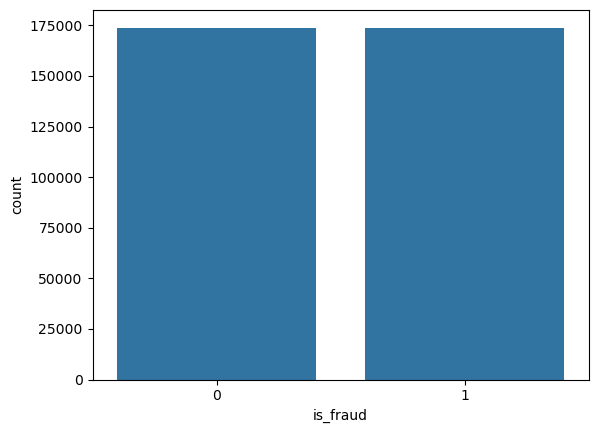

In [34]:
sns.countplot(x='is_fraud', data=df_ros)
plt.show()

## Random Under-Sampling (RUS)

In [35]:
# # Splitting original dataset
# X_train, X_test, y_train, y_test = train_test_split(df.drop('is_fraud',axis=1), df['is_fraud'], test_size=0.3, random_state=42)
# Initialize Random Under Sampler (RUS)
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Print class distribution after RUS
print("Class distribution after RUS:\n", pd.Series(y_train_rus).value_counts())

Class distribution after RUS:
 is_fraud
0    974
1    974
Name: count, dtype: int64


In [36]:
y_train_rus.shape

(1948,)

In [37]:
# Initialize and train a model
model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

# Predictions on original test set
y_pred_rus = model_rus.predict(X_test)


Confusion Matrix (RUS Model):
[[72766  1752]
 [   11   406]]

Classification Report (RUS Model):
              precision    recall  f1-score   support

           0    0.99985   0.97649   0.98803     74518
           1    0.18814   0.97362   0.31534       417

    accuracy                        0.97647     74935
   macro avg    0.59399   0.97506   0.65169     74935
weighted avg    0.99533   0.97647   0.98429     74935



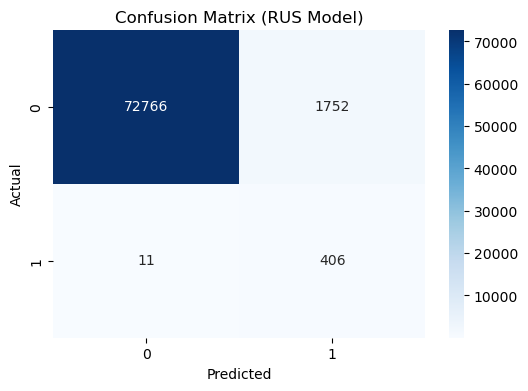

In [38]:
# Compute confusion matrix
cm_rus = confusion_matrix(y_test, y_pred_rus)

# Print confusion matrix and classification report
print("Confusion Matrix (RUS Model):")
print(cm_rus)

print("\nClassification Report (RUS Model):")
print(classification_report(y_test, y_pred_rus, digits=5))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm_rus, "Confusion Matrix (RUS Model)")


In [39]:
import pandas as pd

# Combine X and y into a new DataFrame
df_rus = pd.DataFrame(X_train_rus, columns=X_train.columns)
df_rus['is_fraud'] = y_train_rus  # Add target column back

# Save to CSV
df_rus.to_csv('df_rus.csv', index=False)

In [40]:
df_rus.shape

(1948, 17)

In [41]:
df_rus['is_fraud'].value_counts()

is_fraud
0    974
1    974
Name: count, dtype: int64

## SMOTETomek

In [42]:
# # Splitting original dataset
# X_train, X_test, y_train, y_test = train_test_split(df.drop('is_fraud',axis=1), df['is_fraud'], test_size=0.3, random_state=42)

# Apply SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smotetomek.fit_resample(X_train, y_train)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[74501    17]
 [   30   387]]


In [43]:
X_resampled.shape

(347746, 16)

In [44]:
import pandas as pd

# Combine X and y into a new DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
df_resampled['is_fraud'] = y_resampled  # Add target column back

# Save to CSV
df_resampled.to_csv('SMOTETomek_df.csv', index=False)


In [45]:

# Saving the test DataFrame as a pickle file
df_resampled.to_pickle("SMOTETomek_df.pkl")

In [46]:
df_resampled.shape

(347746, 17)

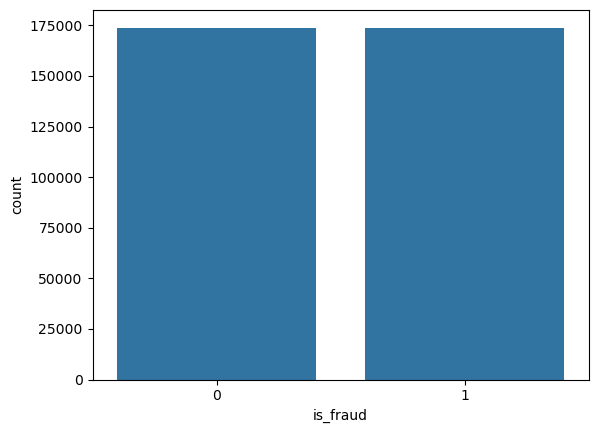

In [47]:
sns.countplot(x='is_fraud', data=df_resampled)
plt.show()

Confusion Matrix (SMOTETomek Model):
[[74501    17]
 [   30   387]]

Classification Report (SMOTETomek Model):
              precision    recall  f1-score   support

           0    0.99960   0.99977   0.99968     74518
           1    0.95792   0.92806   0.94275       417

    accuracy                        0.99937     74935
   macro avg    0.97876   0.96391   0.97122     74935
weighted avg    0.99937   0.99937   0.99937     74935



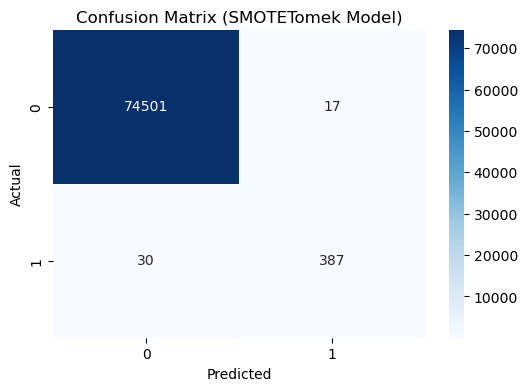

In [48]:
# Compute confusion matrix
cm_SMOTETomek = confusion_matrix(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix (SMOTETomek Model):")
print(cm_SMOTETomek)

print("\nClassification Report (SMOTETomek Model):")
print(classification_report(y_test, y_pred, digits=5))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm_SMOTETomek, "Confusion Matrix (SMOTETomek Model)")

## Conclusion

SMOTETomek performs the best overall, balancing precision and recall for both classes, especially the 'is fraud' (class 1), with high F1-score and accuracy.
RUS struggles with low precision for class 1, despite having high recall. It’s less reliable due to many false positives.
ROS and SMOTE both perform well, with strong precision and recall for class 1, but SMOTETomek still has a slight edge in balancing both metrics.
Overall, SMOTETomek appears to be the most balanced and effective model.

SMOTETomek and ROS models perform best overall, with SMOTETomek slightly leading in terms of fraud detection precision and F1-Score.

SMOTETomek slightly outperforms SMOTE in terms of precision and F1-Score for detecting fraudulent transactions, making it a better choice for fraud detection, as it handles class imbalance better by reducing both false positives and false negatives.

Both models perform well, but SMOTETomek has a slight edge for fraud detection tasks, especially when prioritizing the balance between recall and precision.

RUS struggles with low precision and is not ideal for scenarios where reducing false positives is crucial.